**Adding white-noise channels or all-zeros channels to MNIST**

In [12]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [13]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 8s 19ms/step - loss: 0.6190 - accuracy: 0.8128 - val_loss: 0.3218 - val_accuracy: 0.9032
Epoch 2/10
375/375 [==============================] - 7s 19ms/step - loss: 0.2535 - accuracy: 0.9215 - val_loss: 0.1952 - val_accuracy: 0.9404
Epoch 3/10
375/375 [==============================] - 7s 19ms/step - loss: 0.1637 - accuracy: 0.9498 - val_loss: 0.1807 - val_accuracy: 0.9457
Epoch 4/10
375/375 [==============================] - 7s 19ms/step - loss: 0.1175 - accuracy: 0.9641 - val_loss: 0.1567 - val_accuracy: 0.9535
Epoch 5/10
375/375 [==============================] - 7s 19ms/step - loss: 0.0860 - accuracy: 0.9728 - val_loss: 0.1398 - val_accuracy: 0.9614
Epoch 6/10
375/375 [==============================] - 8s 21ms/step - loss: 0.0647 - accuracy: 0.9793 - val_loss: 0.1215 - val_accuracy: 0.9654
Epoch 7/10
375/375 [==============================] - 7s 20ms/step - loss: 0.0480 - accuracy: 0.9846 - val_loss: 0.1349 - val_accuracy: 0.9617

**Plotting a validation accuracy comparison**

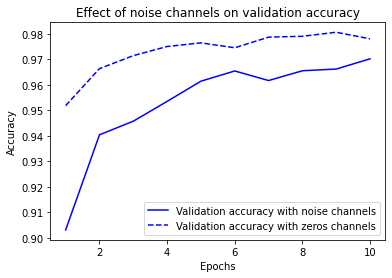

In [15]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

**Fitting a MNIST model with randomly shuffled labels**

In [16]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 12ms/step - loss: 2.3168 - accuracy: 0.1025 - val_loss: 2.3069 - val_accuracy: 0.0988
Epoch 2/10
375/375 [==============================] - 4s 11ms/step - loss: 2.2996 - accuracy: 0.1160 - val_loss: 2.3140 - val_accuracy: 0.0984
Epoch 3/10
375/375 [==============================] - 4s 11ms/step - loss: 2.2911 - accuracy: 0.1277 - val_loss: 2.3183 - val_accuracy: 0.1041
Epoch 4/10
375/375 [==============================] - 4s 11ms/step - loss: 2.2774 - accuracy: 0.1375 - val_loss: 2.3272 - val_accuracy: 0.0997
Epoch 5/10
375/375 [==============================] - 4s 11ms/step - loss: 2.2605 - accuracy: 0.1519 - val_loss: 2.3382 - val_accuracy: 0.0975
Epoch 6/10
375/375 [==============================] - 4s 11ms/step - loss: 2.2405 - accuracy: 0.1684 - val_loss: 2.3475 - val_accuracy: 0.1044
Epoch 7/10
375/375 [==============================] - 4s 11ms/step - loss: 2.2160 - accuracy: 0.1840 - val_loss: 2.3681 - val_accuracy: 0.0999

**Training a MNIST model with an incorrectly high learning rate**

In [17]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 12ms/step - loss: 1116.4281 - accuracy: 0.3786 - val_loss: 4.1036 - val_accuracy: 0.2797
Epoch 2/10
375/375 [==============================] - 4s 11ms/step - loss: 5.1558 - accuracy: 0.2420 - val_loss: 3.7984 - val_accuracy: 0.2769
Epoch 3/10
375/375 [==============================] - 4s 11ms/step - loss: 2.8353 - accuracy: 0.2471 - val_loss: 2.0602 - val_accuracy: 0.2363
Epoch 4/10
375/375 [==============================] - 4s 11ms/step - loss: 2.9830 - accuracy: 0.2366 - val_loss: 2.0982 - val_accuracy: 0.2582
Epoch 5/10
375/375 [==============================] - 4s 11ms/step - loss: 2.5754 - accuracy: 0.2296 - val_loss: 2.3126 - val_accuracy: 0.2147
Epoch 6/10
375/375 [==============================] - 4s 11ms/step - loss: 2.6297 - accuracy: 0.2476 - val_loss: 2.9663 - val_accuracy: 0.2817
Epoch 7/10
375/375 [==============================] - 4s 12ms/step - loss: 2.9042 - accuracy: 0.2637 - val_loss: 2.0818 - val_accuracy: 0.2

**The same model with a more appropriate learning rate**

In [18]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 12ms/step - loss: 0.3393 - accuracy: 0.9129 - val_loss: 0.1660 - val_accuracy: 0.9523
Epoch 2/10
375/375 [==============================] - 4s 12ms/step - loss: 0.1438 - accuracy: 0.9632 - val_loss: 0.1430 - val_accuracy: 0.9642
Epoch 3/10
375/375 [==============================] - 4s 12ms/step - loss: 0.1158 - accuracy: 0.9733 - val_loss: 0.1758 - val_accuracy: 0.9671
Epoch 4/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0979 - accuracy: 0.9782 - val_loss: 0.1840 - val_accuracy: 0.9700
Epoch 5/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0880 - accuracy: 0.9817 - val_loss: 0.1824 - val_accuracy: 0.9723
Epoch 6/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0784 - accuracy: 0.9843 - val_loss: 0.2450 - val_accuracy: 0.9716
Epoch 7/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0761 - accuracy: 0.9853 - val_loss: 0.2314 - val_accuracy: 0.9726

**A simple logistic regression on MNIST**

In [23]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 3ms/step - loss: 0.6722 - accuracy: 0.8344 - val_loss: 0.3595 - val_accuracy: 0.9037
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3505 - accuracy: 0.9039 - val_loss: 0.3088 - val_accuracy: 0.9147
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3152 - accuracy: 0.9127 - val_loss: 0.2906 - val_accuracy: 0.9183
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2995 - accuracy: 0.9169 - val_loss: 0.2813 - val_accuracy: 0.9218
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.2894 - accuracy: 0.9196 - val_loss: 0.2763 - val_accuracy: 0.9237
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2829 - accuracy: 0.9213 - val_loss: 0.2727 - val_accuracy: 0.9239
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2783 - accuracy: 0.9226 - val_loss: 0.2708 - val_accuracy: 0.9249
Epoch 

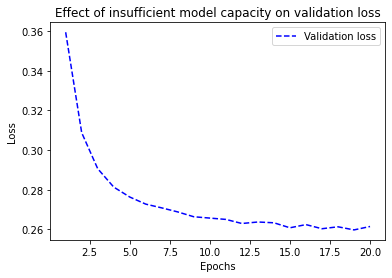

In [24]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [25]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 6ms/step - loss: 0.3638 - accuracy: 0.8989 - val_loss: 0.1863 - val_accuracy: 0.9475
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1632 - accuracy: 0.9520 - val_loss: 0.1494 - val_accuracy: 0.9568
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1155 - accuracy: 0.9656 - val_loss: 0.1271 - val_accuracy: 0.9619
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0887 - accuracy: 0.9736 - val_loss: 0.1174 - val_accuracy: 0.9666
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0699 - accuracy: 0.9786 - val_loss: 0.1065 - val_accuracy: 0.9702
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0570 - accuracy: 0.9822 - val_loss: 0.0949 - val_accuracy: 0.9732
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0474 - accuracy: 0.9846 - val_loss: 0.0954 - val_accuracy: 0.9732
Epoch 

**Original model**

In [26]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=10, batch_size=512, validation_split=0.4)

17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/10
30/30 [==============================] - 2s 49ms/step - loss: 0.5101 - accuracy: 0.7883 - val_loss: 0.3761 - val_accuracy: 0.8734
Epoch 2/10
30/30 [==============================] - 1s 34ms/step - loss: 0.3019 - accuracy: 0.9015 - val_loss: 0.3023 - val_accuracy: 0.8881
Epoch 3/10
30/30 [==============================] - 1s 34ms/step - loss: 0.2247 - accuracy: 0.9275 - val_loss: 0.2757 - val_accuracy: 0.8949
Epoch 4/10
30/30 [==============================] - 1s 37ms/step - loss: 0.1774 - accuracy: 0.9433 - val_loss: 0.2720 - val_accuracy: 0.8942
Epoch 5/10
30/30 [==============================] - 1s 34ms/step - loss: 0.1434 - accuracy: 0.9554 - val_loss: 0.2789 - val_accuracy: 0.8903
Epoch 6/10
30/30 [==============================] - 1s 35ms/step - loss: 0.1176 - accuracy: 0.9641 - val_loss: 0.3304 - val_accuracy: 0.8758
Epoch 7/10
30/30 [==============================] - 1s 37ms/step - loss: 0.0958 - accurac

**Version of the model with lower capacity**

In [27]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=10, batch_size=512, validation_split=0.4)

Epoch 1/10
30/30 [==============================] - 2s 38ms/step - loss: 0.6211 - accuracy: 0.7743 - val_loss: 0.5529 - val_accuracy: 0.8430
Epoch 2/10
30/30 [==============================] - 1s 29ms/step - loss: 0.4928 - accuracy: 0.8685 - val_loss: 0.4563 - val_accuracy: 0.8599
Epoch 3/10
30/30 [==============================] - 1s 31ms/step - loss: 0.3986 - accuracy: 0.8877 - val_loss: 0.3877 - val_accuracy: 0.8716
Epoch 4/10
30/30 [==============================] - 1s 33ms/step - loss: 0.3294 - accuracy: 0.9030 - val_loss: 0.3468 - val_accuracy: 0.8740
Epoch 5/10
30/30 [==============================] - 1s 28ms/step - loss: 0.2792 - accuracy: 0.9137 - val_loss: 0.3127 - val_accuracy: 0.8832
Epoch 6/10
30/30 [==============================] - 1s 30ms/step - loss: 0.2418 - accuracy: 0.9238 - val_loss: 0.2924 - val_accuracy: 0.8865
Epoch 7/10
30/30 [==============================] - 1s 29ms/step - loss: 0.2122 - accuracy: 0.9321 - val_loss: 0.2801 - val_accuracy: 0.8897
Epoch 8/10
30

**Version of the model with higher capacity**

In [28]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=10, batch_size=512, validation_split=0.4)

Epoch 1/10
30/30 [==============================] - 9s 296ms/step - loss: 0.5695 - accuracy: 0.7873 - val_loss: 0.3012 - val_accuracy: 0.8768
Epoch 2/10
30/30 [==============================] - 8s 284ms/step - loss: 0.2611 - accuracy: 0.8965 - val_loss: 0.2684 - val_accuracy: 0.8893
Epoch 3/10
30/30 [==============================] - 8s 283ms/step - loss: 0.1414 - accuracy: 0.9450 - val_loss: 0.3683 - val_accuracy: 0.8697
Epoch 4/10
30/30 [==============================] - 8s 283ms/step - loss: 0.0844 - accuracy: 0.9718 - val_loss: 0.5126 - val_accuracy: 0.8590
Epoch 5/10
30/30 [==============================] - 9s 286ms/step - loss: 0.1374 - accuracy: 0.9735 - val_loss: 0.2930 - val_accuracy: 0.8846
Epoch 6/10
30/30 [==============================] - 8s 284ms/step - loss: 0.0083 - accuracy: 0.9999 - val_loss: 0.4978 - val_accuracy: 0.8881
Epoch 7/10
30/30 [==============================] - 8s 285ms/step - loss: 9.3977e-04 - accuracy: 0.9998 - val_loss: 0.6109 - val_accuracy: 0.8876
Ep

**Adding L2 weight regularization to the model**

In [29]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=10, batch_size=512, validation_split=0.4)

Epoch 1/10
30/30 [==============================] - 2s 44ms/step - loss: 0.5755 - accuracy: 0.7881 - val_loss: 0.4414 - val_accuracy: 0.8729
Epoch 2/10
30/30 [==============================] - 1s 33ms/step - loss: 0.3823 - accuracy: 0.8975 - val_loss: 0.3921 - val_accuracy: 0.8754
Epoch 3/10
30/30 [==============================] - 1s 31ms/step - loss: 0.3198 - accuracy: 0.9198 - val_loss: 0.4171 - val_accuracy: 0.8568
Epoch 4/10
30/30 [==============================] - 1s 32ms/step - loss: 0.2897 - accuracy: 0.9274 - val_loss: 0.3597 - val_accuracy: 0.8883
Epoch 5/10
30/30 [==============================] - 1s 32ms/step - loss: 0.2734 - accuracy: 0.9323 - val_loss: 0.3612 - val_accuracy: 0.8889
Epoch 6/10
30/30 [==============================] - 1s 32ms/step - loss: 0.2596 - accuracy: 0.9399 - val_loss: 0.3652 - val_accuracy: 0.8856
Epoch 7/10
30/30 [==============================] - 1s 32ms/step - loss: 0.2496 - accuracy: 0.9405 - val_loss: 0.3779 - val_accuracy: 0.8804
Epoch 8/10
30

**Different weight regularizers available in Keras**

In [30]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

**Adding dropout to the IMDB model**

In [31]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=10, batch_size=512, validation_split=0.4)

Epoch 1/10
30/30 [==============================] - 2s 44ms/step - loss: 0.6171 - accuracy: 0.6684 - val_loss: 0.4916 - val_accuracy: 0.8553
Epoch 2/10
30/30 [==============================] - 1s 32ms/step - loss: 0.4924 - accuracy: 0.7830 - val_loss: 0.3744 - val_accuracy: 0.8827
Epoch 3/10
30/30 [==============================] - 1s 32ms/step - loss: 0.4091 - accuracy: 0.8368 - val_loss: 0.3346 - val_accuracy: 0.8873
Epoch 4/10
30/30 [==============================] - 1s 32ms/step - loss: 0.3524 - accuracy: 0.8659 - val_loss: 0.2941 - val_accuracy: 0.8899
Epoch 5/10
30/30 [==============================] - 1s 32ms/step - loss: 0.3110 - accuracy: 0.8849 - val_loss: 0.2805 - val_accuracy: 0.8920
Epoch 6/10
30/30 [==============================] - 1s 32ms/step - loss: 0.2672 - accuracy: 0.9024 - val_loss: 0.2753 - val_accuracy: 0.8914
Epoch 7/10
30/30 [==============================] - 1s 32ms/step - loss: 0.2407 - accuracy: 0.9171 - val_loss: 0.2787 - val_accuracy: 0.8918
Epoch 8/10
30